In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [4]:
from helpers import load_data

# load dataset
x, y = load_data()

In [5]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [6]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    y_test = np.take(y, k_indices[k])
    x_test = np.take(x, k_indices[k])
    
    k_indices_new = np.delete(k_indices, k, 0)
    k_flattened_new = k_indices_new.flatten()
    
    y_train = np.take(y, k_flattened_new)
    x_train = np.take(x, k_flattened_new)
    
    tx_test = build_poly(x_test, degree)
    tx_train = build_poly(x_train, degree)
    
    w = ridge_regression(y_train, tx_train, lambda_)
    
    rmse_tr = np.sqrt(2 * compute_mse(y_train, tx_train, w))
    rmse_te = np.sqrt(2 * compute_mse(y_test, tx_test, w))
    return rmse_tr, rmse_te 

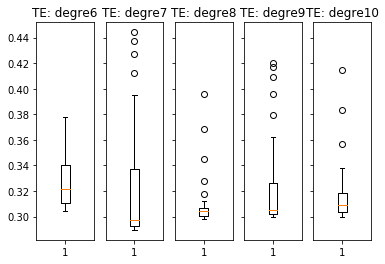

In [7]:
from plots import cross_validation_visualization

def cross_validation_demo(degree):
    seed = 1
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    #lambdas = [0,0.001,0.005,0.01]
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)

    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for i in lambdas:
        tr, te = 0, 0
        for j in range(k_fold):
            tmp_tr, tmp_te = cross_validation(y, x, k_indices, j, i, degree)
            tr += tmp_tr
            te += tmp_te
        rmse_tr.append(tr/k_fold)
        rmse_te.append(te/k_fold)
    
    #cross_validation_visualization(lambdas, rmse_tr, rmse_te, degree)
    return rmse_tr, rmse_te
    #ax1.boxplot(rmse_tr)
    #ax1.set_title('Sharing Y axis')
    #ax2.boxplot(rmse_tr)

d = 5    
f, axarr = plt.subplots(1, d, sharey=True)
rmse_tr_d = []
rmse_te_d = []
for i in range(6,(6+d)):
    rmse_tr, rmse_te = cross_validation_demo(i)
    rmse_tr_d.append(rmse_tr)
    rmse_te_d.append(rmse_te)
    #axarr[i-6].boxplot(rmse_tr_d[i-6])
    axarr[i-6].set_title("TE: degre{}".format(i))
    axarr[i-6].boxplot(rmse_te_d[i-6])
    
plt.savefig("box plot rmse", dpi=256)

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

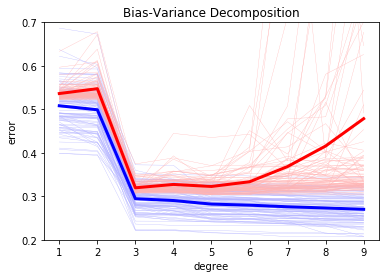

In [30]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization
from costs import compute_mse

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        train_x, test_x, train_y, test_y  = split_data (x,y,ratio_train,seed)
        
        for degree in degrees:
            train_tx = build_poly(train_x, degree)
            test_tx = build_poly(test_x, degree)
            mse, w = least_squares(train_y, train_tx)
            rmse_tr[index_seed, degree - 1] = np.sqrt(2 * mse)
            rmse_te[index_seed, degree - 1] = np.sqrt(2 * compute_mse(test_y, test_tx, w))
        
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()